<a href="https://colab.research.google.com/github/arora123/Analytics-DS-ML-Projects-for-beginners_Python/blob/main/HR__Gender_Pay_Gap_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
#@title 
%%html
<marquee style='width: 100%; color: #4788f4;font-size:30px;'><b>Demystifying Gender Pay Gap!</b></marquee>

# Project Information

It is a very basic analytics project for beginners to understand how to explore data to get some insights using python

- Library used - Pandas

- Data - https://raw.githubusercontent.com/arora123/Data/master/emp-data.csv

- Data Description - Name, Gender, Department, Salary, Location & Ratings of 1015 employees [All column names are self explainatory]

- Objectives - 
1. How many Males/Females are there in the entire organization? 
2. How many Males/Females are there in the each department or for each location? 
3. For which department is the average Pay highest?
4. For which location is the average Pay highest?
5. What percentage of employees received good & very good rating? What about poor & very poor rating? and average rating?
6. Compute gender pay gap for each department. Interpret
7. Compute gender pay gap for each location. Interpret



# Importing libraries

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [111]:
# emp = pd.read_csv("D:\Learning\Learn Excel\HR Analytics\emp-data.csv")
emp = pd.read_csv("https://raw.githubusercontent.com/arora123/Data/master/emp-data.csv")


emp.head()

,Name,Gender,Department,Salary,Loc,Rating
0,Ches Bonnell,Male,Sales,"$88,050",Bellevue,Very Good
1,Garwin Peasegood,Female,Engineering,"$68,220",Bellevue,Good
2,Sidoney Yitzhok,Female,NaN,"$118,440",Wellington,Not Rated
3,Saunders Blumson,NaN,Legal,"$56,370",Los Angeles,Very Good
4,Gardy Grigorey,Female,Support,"$107,090",Los Angeles,Poor


Did you notice, values in Salary column are containing '$' and ',' ?

These values might be stored as string data type.

Let's check:

# An interactive display of data for filtering, sorting & exploration

Colab includes an extension that renders pandas dataframes into interactive data tables

Data table display for Pandas dataframes can be enabled by running:
```python
%load_ext google.colab.data_table
```
and disabled by running
```python
%unload_ext google.colab.data_table
```

In [112]:
%load_ext google.colab.data_table
emp

,Name,Gender,Department,Salary,Loc,Rating
0,Ches Bonnell,Male,Sales,"$88,050",Bellevue,Very Good
1,Garwin Peasegood,Female,Engineering,"$68,220",Bellevue,Good
2,Sidoney Yitzhok,Female,NaN,"$118,440",Wellington,Not Rated
3,Saunders Blumson,NaN,Legal,"$56,370",Los Angeles,Very Good
4,Gardy Grigorey,Female,Support,"$107,090",Los Angeles,Poor
...,...,...,...,...,...,...
1010,Shaylyn Ransbury,Female,Support,"$100,370",Wellington,Average
1011,Christoph Stretton,Female,Business Development,"$90,240",Wellington,Poor
1012,Jordain Cyster,Female,Engineering,"$75,870",Los Angeles,Average
1013,Malory Biles,Female,Training,"$58,740",Los Angeles,Not Rated


In [113]:
emp.head(10)

,Name,Gender,Department,Salary,Loc,Rating
0,Ches Bonnell,Male,Sales,"$88,050",Bellevue,Very Good
1,Garwin Peasegood,Female,Engineering,"$68,220",Bellevue,Good
2,Sidoney Yitzhok,Female,NaN,"$118,440",Wellington,Not Rated
3,Saunders Blumson,NaN,Legal,"$56,370",Los Angeles,Very Good
4,Gardy Grigorey,Female,Support,"$107,090",Los Angeles,Poor
5,Marlie Charsley,Male,Support,"$108,450",Wellington,Poor
6,Adella Hartshorne,Female,Human Resources,"$41,160",Bellevue,Average
7,Rasla Fisby,Male,Legal,"$109,000",Wellington,Very Good
8,Rayna Gamlin,NaN,Services,NaN,Wellington,Average
9,Willi Vasey,Female,Support,"$43,020",Los Angeles,Average


In [114]:
# To restore native pandas data frame
%unload_ext google.colab.data_table
emp.head(3)

,Name,Gender,Department,Salary,Loc,Rating
0,Ches Bonnell,Male,Sales,"$88,050",Bellevue,Very Good
1,Garwin Peasegood,Female,Engineering,"$68,220",Bellevue,Good
2,Sidoney Yitzhok,Female,NaN,"$118,440",Wellington,Not Rated


# Exploring Data

In [115]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        1015 non-null   object
 1   Gender      972 non-null    object
 2   Department  987 non-null    object
 3   Salary      972 non-null    object
 4   Loc         1015 non-null   object
 5   Rating      1015 non-null   object
dtypes: object(6)
memory usage: 47.7+ KB


**Observations:**

1. All columns including 'Salary' are of 'object' data type, while statistically 'Salary' should be of numeric (float to be specific) data type
2. There are null values in Department, Gender & Salary columns

We will handle these issues one by one.

## let's check data type for all values in 'Salary' column

In [116]:
# emp['Salary'].apply(type)
emp['Salary'].apply(type).value_counts()

<class 'str'>      972
<class 'float'>     43
Name: Salary, dtype: int64

'Salary' column contains a mix of string & float values

To convert 'Salary' column to float data type, we need to first remove dollar sign & comma and then convert it to float (typecasting)

## Let's remove dollar sign & comma from 'Salary' column
There are multiple approaches to do the same. 

In [117]:
# Using str.replace method to remove dollar sign & comma
emp['Salary'] = emp['Salary'].str.replace(',', '')
emp['Salary'] = emp['Salary'].str.replace('$', '')
print('After removing unwanted strings from Salary column: ', '\n', emp['Salary'].head(), '\n')

emp['Salary'] = emp['Salary'].astype(float)
print('Converting to float data type Salary column: ', '\n', emp['Salary'].head())

# we can also perform these operations in one line of code
# emp['Salary'] = emp['Salary'].str.replace(',', '').str.replace('$', '').astype(float)

After removing unwanted strings from Salary column:  
 0     88050 
1     68220 
2    118440 
3     56370 
4    107090 
Name: Salary, dtype: object 

Converting to float data type Salary column:  
 0     88050.0
1     68220.0
2    118440.0
3     56370.0
4    107090.0
Name: Salary, dtype: float64


## Other approaches

In [118]:
# Using a function which checks data type of each value in a column in remove unwanted strings 

# def clean_currency(x):
#     """ If the value is a string, then remove currency symbol and delimiters
#     otherwise, the value is numeric and can be converted
#     """
#     if isinstance(x, str):
#         return(x.replace('$', '').replace(',', ''))
#     return(x)

# emp['Salary'] = emp['Salary'].apply(clean_currency).astype(float)


In [119]:
# Using regex

# emp['Salary'] = emp['Salary'].replace({'\$': '', ',': ''}, regex=True).astype(float)


##Let's now understand missing values


In [120]:
 # All rows with missing values in any column
emp[emp.isna().any(axis=1)]

,Name,Gender,Department,Salary,Loc,Rating
2,Sidoney Yitzhok,Female,NaN,118440.0,Wellington,Not Rated
3,Saunders Blumson,NaN,Legal,56370.0,Los Angeles,Very Good
8,Rayna Gamlin,NaN,Services,NaN,Wellington,Average
30,Mollie Hanway,Male,NaN,112650.0,Bellevue,Average
45,Fancy Bonin,NaN,Training,84680.0,Bellevue,Good
...,...,...,...,...,...,...
974,Jerrilee Maginot,Male,Business Development,NaN,Los Angeles,Average
980,Jolynn Edkins,Female,Support,NaN,Los Angeles,Average
989,Frasquito Mosley,NaN,Support,48090.0,Wellington,Not Rated
992,Fairfax Wallsam,NaN,Sales,88590.0,Wellington,Average


In [121]:
# Rows with missing values in Salary & Department column
emp[(emp['Salary'].isna()) & (emp['Department'].isna())]

,Name,Gender,Department,Salary,Loc,Rating
343,Dewey Berthod,Female,NaN,NaN,Bellevue,Average
470,Aloise MacCathay,Male,NaN,NaN,Bellevue,Average


Only two rows with missing values in both column, may be they've left

 - Missing Salary might be indicating employees who have left, we can remove those rows
 - Missing values in department might be indicating, they have moved to sister company, we will remove these rows too

## Removing missing values from 'Salary' & 'Department' column 

In [122]:
 emp.dropna(subset = ['Salary', 'Department'], inplace=True)

In [123]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 946 entries, 0 to 1014
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        946 non-null    object 
 1   Gender      906 non-null    object 
 2   Department  946 non-null    object 
 3   Salary      946 non-null    float64
 4   Loc         946 non-null    object 
 5   Rating      946 non-null    object 
dtypes: float64(1), object(5)
memory usage: 51.7+ KB


Now, the missing values in 'Gender' column might be those who've chosen not to reveal their gender
Or they didn't find appropriate category

## Let's fill missing values in 'Gender' column by 'Not revealed' or 'Unknown' or 'Other'

In [124]:
emp['Gender'] = emp['Gender'].fillna('Not Revealed')

## Let's look at descriptive statistics for 'all' columns

In [125]:
emp.describe(include = 'all') 

,Name,Gender,Department,Salary,Loc,Rating
count,946,946,946,946.000000,946,946
unique,874,3,12,NaN,3,6
top,Easter Pyke,Male,Product Management,NaN,Los Angeles,Average
freq,2,465,89,NaN,361,420
mean,NaN,NaN,NaN,73703.668076,NaN,NaN
std,NaN,NaN,NaN,26594.076664,NaN,NaN
min,NaN,NaN,NaN,28130.000000,NaN,NaN
25%,NaN,NaN,NaN,50537.500000,NaN,NaN
50%,NaN,NaN,NaN,73300.000000,NaN,NaN
75%,NaN,NaN,NaN,96597.500000,NaN,NaN


**Observations:**

1. Name column - out of 946 entries, only 874 are unique. It indicates presence of duplicate entries like the name 'Calvin O'Carroll' occuring twice
2. Gender Column - three categories, Male, Female & 'Not Revealed' with more (465) Males in the data set
3. 12 categories of departments, 3 locations and 6 categories of ratings (maximum employees got ;Average' rating)
4. Salary - mean value is 73703 and median is 73300. It indicates right skewed distribution as expected


## Let's explore duplicate entries in 'Name' column

In [126]:
#let's look at those names
# emp.duplicated('Name')
# emp.duplicated('Name').value_counts() # 72 names are duplicated
emp[emp.duplicated('Name') == True] # 72 names are duplicated

,Name,Gender,Department,Salary,Loc,Rating
130,Larry Pioch,Male,Research and Development,49670.0,Wellington,Good
145,Adella Hartshorne,Female,Human Resources,41160.0,Wellington,Good
155,Katya Hundy,Male,Business Development,88510.0,Los Angeles,Poor
168,Crawford Scad,Male,Human Resources,72880.0,Bellevue,Average
272,Calvin O'Carroll,Female,Research and Development,44450.0,Los Angeles,Very Poor
...,...,...,...,...,...,...
981,Beverie Moffet,Female,Support,75970.0,Los Angeles,Average
983,Alida Welman,Male,Human Resources,69860.0,Bellevue,Poor
996,Joella Maevela,Female,Sales,76210.0,Los Angeles,Good
1004,Curtice Advani,Male,Product Management,59810.0,Bellevue,Good


In [127]:
#Another approach
names = emp.Name.value_counts()
names[names > 1]

Easter Pyke         2
Gilles Jaquet       2
Joyce Esel          2
Minetta Parsons     2
Cathi Delgardo      2
                   ..
Louise Lamming      2
Murry Dryburgh      2
Sheff Gerdts        2
Joana Bartocci      2
Rhiamon Mollison    2
Name: Name, Length: 72, dtype: int64

In [128]:
emp[emp.Name == 'Larry Pioch'] #same employee but rating different?
# emp[emp.Name == 'Adella Hartshorne'] #may be different employee or data entry error
# emp[emp.Name == "Calvin O'Carroll"] #may be different employee or data entry error

,Name,Gender,Department,Salary,Loc,Rating
69,Larry Pioch,Male,Research and Development,49670.0,Wellington,Poor
130,Larry Pioch,Male,Research and Development,49670.0,Wellington,Good


In [129]:
#@title
# We can use excel to quickly watch rows with duplicated names for better understanding
# Let's write a csv file for these rows 
# emp1 = emp[emp.duplicated('Name') == True]

# emp1.to_csv('emp1.csv')
# in excel it shows no duplicates in emp and emp1 file?

**Observations:**
1. 72 names are repeated twice in the data set
2. Some entries look same and some look different

May be a few of those represent different employess with the same name but mostly it looks data entry error as salaries look same 

**How to Handle This Issue?:** 

Ideally, as an analyst, you need to verify the record of these employess from employee database 

Usually in an organizations, each employee is given a unique employee-id which helps to identify the issues related to duplicate names

Such data quality issues can have big impact on analysis

Here, for the purpose of demostration, we are removing all rows with duplicated names 

## Let's remove all rows with duplicated names 

In [130]:
emp.drop_duplicates(subset = 'Name', inplace=True) # default keep='first'
# Here, we are dropping all duplicates except for the first occurrence. 
# Other options are keep='last' or keep='False'
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html

In [131]:
emp.describe(include='all')

,Name,Gender,Department,Salary,Loc,Rating
count,874,874,874,874.000000,874,874
unique,874,3,12,NaN,3,6
top,Jan Morforth,Male,Legal,NaN,Los Angeles,Average
freq,1,430,80,NaN,337,400
mean,NaN,NaN,NaN,73831.510297,NaN,NaN
std,NaN,NaN,NaN,26744.983091,NaN,NaN
min,NaN,NaN,NaN,28130.000000,NaN,NaN
25%,NaN,NaN,NaN,50537.500000,NaN,NaN
50%,NaN,NaN,NaN,74195.000000,NaN,NaN
75%,NaN,NaN,NaN,96780.000000,NaN,NaN


- Now, we've 874 rows
- 'Salary' is still right skewed as expected

# Getting Insights

## How many Males/Females are there in the entire organization? 


In [132]:
emp['Gender'].value_counts()
# emp['Gender'].value_counts().sum() #874

Male            430
Female          406
Not Revealed     38
Name: Gender, dtype: int64

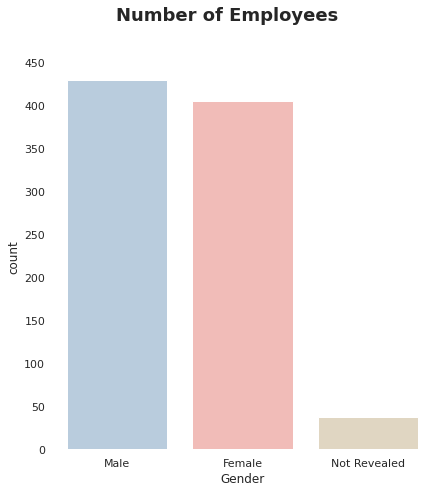

In [133]:
#@title
custom_palette = ['#B3CDE3','#FBB4AE','#E5D8BD'] # Creating custome color palette
sns.set_theme(context='notebook', style='white', palette=custom_palette, 
              font='sans-serif', font_scale=1, 
              color_codes=False, rc=None)


ax = sns.catplot(x='Gender', data=emp, kind = 'count', height=6);
# sns.countplot(x='Gender', data=emp)
ax.set(ylim=(0, 450))

ax.fig.suptitle('Number of Employees',position=(0.5,1.10), 
                fontweight='bold', size=18)


sns.despine(left=True,bottom=True ,offset=10, trim=True) #Reducing junk

In [134]:
#@title
Gender_perc = emp['Gender'].value_counts()/emp['Gender'].value_counts().sum()
Gender_perc.round(2)

Male            0.49
Female          0.46
Not Revealed    0.04
Name: Gender, dtype: float64

In [135]:
#@title
emp['Gender'].describe()

count      874
unique       3
top       Male
freq       430
Name: Gender, dtype: object

**Out of total 874 employees, 430 (49%) are males, 406 (46%) are females and Gender of 38 employees is not unknown to us  **

## Gender-wise Average Salary [Across Organization


In [136]:
emp.groupby('Gender')['Salary'].mean().round(0)

Gender
Female          72610.0
Male            74507.0
Not Revealed    79245.0
Name: Salary, dtype: float64

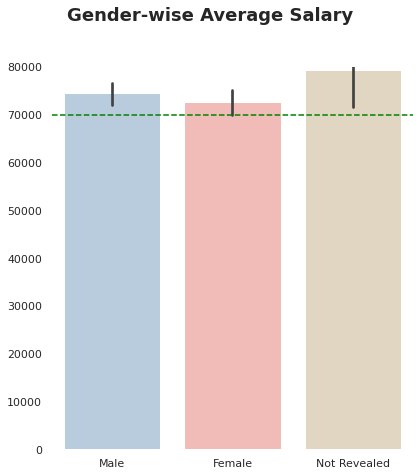

In [137]:
#@title
sns.set_theme(context='notebook', style='white', palette=custom_palette, 
              font='sans-serif', font_scale=1, 
              color_codes=False, rc=None)


ax = sns.catplot(x='Gender', y='Salary', data = emp, kind='bar', height=6);
# sns.barplot(x='Gender', y='Salary', data = emp);
ax.set(ylim=(0, 80000))


ax.map(plt.axhline, y=70000, ls='--', c='green') #Adding horizontal line
# ax.set_ylabels("Average Pay")
ax.fig.suptitle('Gender-wise Average Salary',position=(0.5,1.10), 
                fontweight='bold', size=18)
sns.despine(left=True,bottom=True ,offset=10, trim=True) #Reducing junk

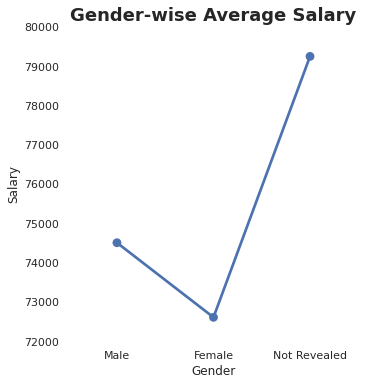

In [138]:
#@title

sns.set_theme(context='notebook', style='white',  
              font='sans-serif', font_scale=1, 
              color_codes=False, rc=None)

# sns.catplot(x='Gender', y='Salary', data = emp, kind='bar');
ax = sns.catplot(x='Gender', y='Salary', data = emp, kind='point', ci=None);

plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Gender-wise Average Salary",position=(0.5,1.10), 
                fontweight='bold', size=18)

ax.set(ylim=(72000, 80000))


sns.despine(left=True,bottom=True ,offset=10, trim=True) #Reducing junk

# from numpy import median
# sns.catplot(x='Gender', y='Salary', data = emp, kind='point', 
#             estimator=median)

## How many Males/Females are there in the each department or for each location? 

In [139]:
# Male/Female in each department
gender_dept = pd.crosstab(emp['Gender'], emp['Department'])
gender_dept
# gender_dept.sort_values('Gender',ascending=False)

Department,Accounting,Business Development,Engineering,Human Resources,Legal,Marketing,Product Management,Research and Development,Sales,Services,Support,Training
Gender,,,,,,,,,,,,
Female,27,38,35,37,32,31,39,32,32,39,30,34
Male,36,33,35,33,44,31,40,28,39,35,41,35
Not Revealed,2,3,5,3,4,1,1,5,4,3,4,3


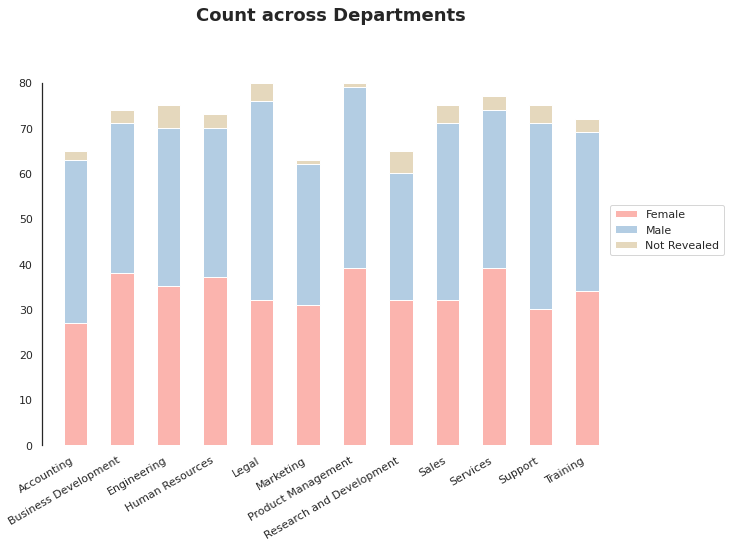

In [140]:
# gender_dept.T.plot.bar(stacked=True, label = ['Females', 'Males', 'Not Revealed']);
# plt.legend(loc=2)

new_palette = ['#FBB4AE', '#B3CDE3','#E5D8BD']
sns.set_theme(context='notebook', style='white', palette=new_palette, 
              font='sans-serif', font_scale=1, 
              color_codes=False, rc=None)

ax = gender_dept.T.plot.bar(stacked=True, figsize=(10,7)).legend(loc= [1, 0.5]);

plt.xticks(rotation=30, horizontalalignment="right")
plt.title("Count across Departments",position=(0.5,1.10), 
                fontweight='bold', size=18)

plt.xlabel(xlabel="")

sns.despine(left=False,bottom=True ,offset=10, trim=True)

- **We have more females in 'Business Development', 'HR' and 'Research & Development'**
- In rest all departments, we've more males than females
- Here, we are ignoring gender of those who've chosen not to reveal


In [141]:
# Male/Female in each location
gender_loc = pd.crosstab(emp['Gender'], emp['Loc'])
gender_loc

Loc,Bellevue,Los Angeles,Wellington
Gender,,,
Female,111,151,144
Male,114,172,144
Not Revealed,8,14,16


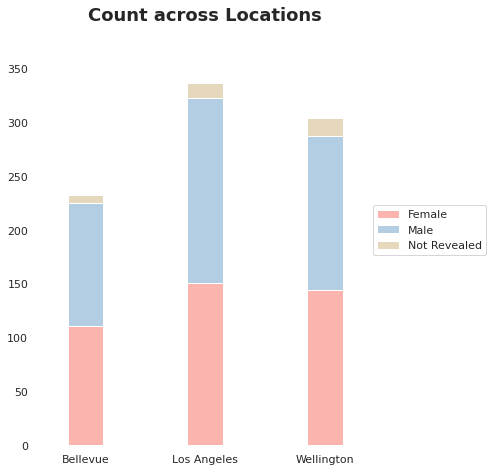

In [142]:
# sns.displot(emp, x='Loc', hue='Gender', multiple='stack',  
#             binwidth=3, height=8.27, aspect=1.2)
# plt.xticks(rotation=30, horizontalalignment="center")
# plt.title("Count across Locations")


sns.set_theme(context='notebook', style='white', palette=new_palette, 
              font='sans-serif', font_scale=1, 
              color_codes=False, rc=None)

# ax = gender_loc.T.plot.bar(stacked=True).legend(loc= [1, 0.5]);
ax = gender_loc.T.plot(kind='bar', stacked=True, width=0.3, figsize=(6,7)).legend(loc= [1, 0.5]);

plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Count across Locations",position=(0.5,1.10), 
                fontweight='bold', size=18)

plt.xlabel(xlabel="")

sns.despine(left=True,bottom=True ,offset=10, trim=True) #Reducing junk

** We've more males than females at all locations except Wellington, where we've equal number of males & females.**

## For which department is the average Pay highest? And how much is it?

In [143]:
# Department-wise average salary
emp.groupby('Department')['Salary'].mean().round(0)

Department
Accounting                  75896.0
Business Development        76309.0
Engineering                 71959.0
Human Resources             71473.0
Legal                       72663.0
Marketing                   76646.0
Product Management          72082.0
Research and Development    69768.0
Sales                       71751.0
Services                    76711.0
Support                     74823.0
Training                    76266.0
Name: Salary, dtype: float64

In [144]:
# Higest paying departments
emp.groupby('Department')['Salary'].mean().nlargest()

Department
Services                76710.779221
Marketing               76646.349206
Business Development    76309.189189
Training                76266.250000
Accounting              75896.307692
Name: Salary, dtype: float64

In [145]:
# Lowest paying departments 
emp.groupby('Department')['Salary'].mean().nsmallest()
# emp.groupby('Department')['Salary'].mean().nsmallest(3)

Department
Research and Development    69768.153846
Human Resources             71472.739726
Sales                       71750.933333
Engineering                 71958.533333
Product Management          72082.375000
Name: Salary, dtype: float64

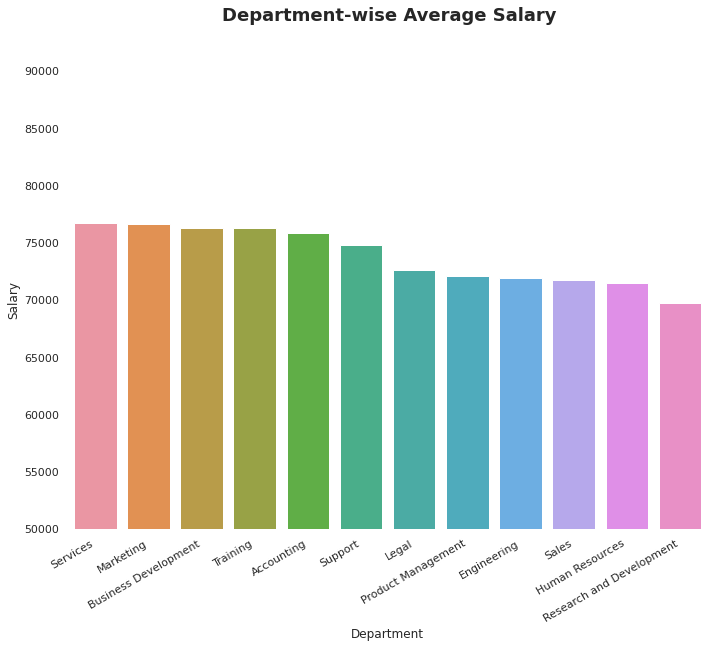

In [146]:
sns.set_theme(context='notebook', style='white', palette='Blues', 
              font='sans-serif', font_scale=1, 
              color_codes=False, rc=None)

plot_order = emp.groupby('Department')['Salary'].mean().sort_values(ascending=False).index.values

ax = sns.catplot(x='Department', y='Salary', data=emp, kind='bar', 
                 order=plot_order, 
                 height=7, aspect = 1.5, ci=None);

plt.xticks(rotation=30, horizontalalignment="right")

ax.set(ylim=(50000, 90000))

ax.fig.suptitle('Department-wise Average Salary',position=(0.5,1.10), 
                fontweight='bold', size=18)

sns.despine(left=True,bottom=True ,offset=10, trim=True) #Reducing junk

In [147]:
#@title
emp.groupby('Department')['Salary'].mean().round(0).max()
emp.groupby('Department')['Salary'].mean().round(0).min()

69768.0

- Highest average salary is 76711 dollars for 'Services'  department and 
- Lowest is $ 69768 for 'Research and Development' department

## Which location has highest & lowest average salary?

In [148]:
# Location-wise average salary
emp.groupby('Loc')['Salary'].mean().round(0)

Loc
Bellevue       76100.0
Los Angeles    73580.0
Wellington     72372.0
Name: Salary, dtype: float64

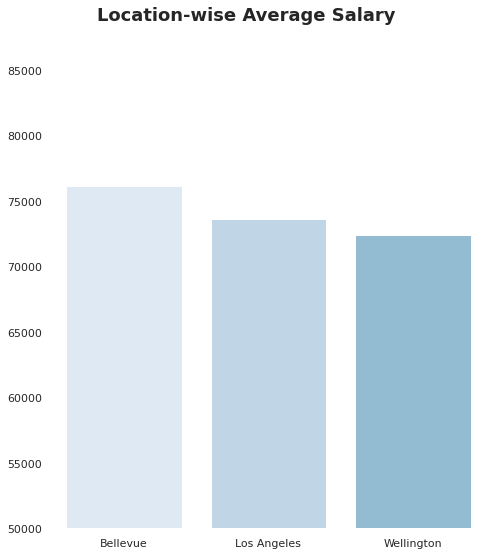

In [149]:
#@title
sns.set_theme(context='notebook', style='white', palette='Blues', 
              font='sans-serif', font_scale=1, 
              color_codes=False, rc=None)

plot_order = emp.groupby('Loc')['Salary'].mean().sort_values(ascending=False).index.values

ax = sns.catplot(x='Loc', y='Salary', data=emp, kind='bar', 
                 order=plot_order, 
                 height=7, aspect = 1, ci=None);

plt.xticks(rotation=0, horizontalalignment="center")

ax.set(ylim=(50000, 85000))
ax.set_ylabels("")
ax.set_xlabels("")

ax.fig.suptitle('Location-wise Average Salary',position=(0.5,1.10), 
                fontweight='bold', size=18)

sns.despine(left=True,bottom=True ,offset=10, trim=True) #Reducing junk

- Wellington location provides lowest average salary (72372 dollars) & 
- Bellevue provides highest average salary (76100 dollars)

## What percentage of employees received good & very good rating? What about poor & very poor rating? and average rating?

In [150]:
emp['Rating'].value_counts()

Average      400
Good         163
Poor         116
Very Good     81
Not Rated     61
Very Poor     53
Name: Rating, dtype: int64

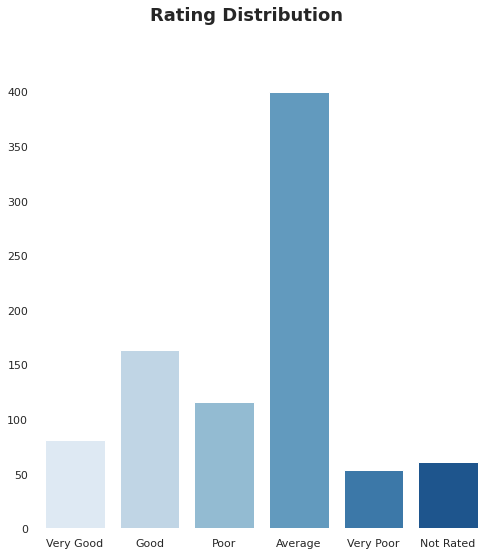

In [151]:
#@title
sns.set_theme(context='notebook', style='white', palette='Blues', 
              font='sans-serif', font_scale=1, 
              color_codes=False, rc=None)

ax = sns.catplot(x='Rating',data=emp, kind='count',  
                 height=7, aspect = 1, ci=None);

plt.xticks(rotation=0, horizontalalignment="center")


ax.set_ylabels("")
ax.set_xlabels("")

ax.fig.suptitle('Rating Distribution',position=(0.5,1.10), 
                fontweight='bold', size=18)

sns.despine(left=True,bottom=True ,offset=10, trim=True) #Reducing junk

In [152]:
#@title
rating_perc = 100*emp['Rating'].value_counts()/emp['Rating'].value_counts().sum()
rating_perc.round(0)

Average      46.0
Good         19.0
Poor         13.0
Very Good     9.0
Not Rated     7.0
Very Poor     6.0
Name: Rating, dtype: float64

- maximum 46% amployees received 'Average' rating
- 19 & 13 % employess received 'Good' and 'Very good' ratings respectively
- 13 & 6 % employess received 'poor' and 'very poor' ratings respecctively
- 7 % employees did not recieve any rating

## Compute gender pay gap across the organization. Interpret

In [153]:
# Gender-wise average salary
emp.groupby('Gender')['Salary'].mean().round(0)

Gender
Female          72610.0
Male            74507.0
Not Revealed    79245.0
Name: Salary, dtype: float64

In [154]:
#@title
pay_m = emp[emp['Gender'] == 'Male']['Salary'].mean()
print("Average pay for males across the organization: ", round(pay_m, 0), '\n')

pay_f = emp[emp['Gender'] == 'Female']['Salary'].mean()
print("Average pay for females across the organization: ", round(pay_f, 0))

Average pay for males across the organization:  74507.0 

Average pay for females across the organization:  72610.0


Data suggests that on an average females get less salary than males.

## Let's compute gender pay gap across organization

- To compute gender wage gap, we've calculated the mean difference between male and female's pay based on job categories. 

Then we've converted the values into a percentage by using this formula:

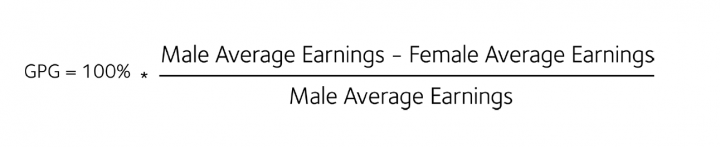


In [155]:
pay_gap = (pay_m/pay_f - 1)*100 
pay_gap 

2.6124554508039743

**Interpretation:**

- positive value indicate females are underpaid

if this value is negative, it would indicate that males are underpaid

- On an average females get 2.6%  less salary than males

- Can we say, there is a favoritism against females? Actually, no.

Think on it !

[It's not adjusted for other factors]

## Compute gender pay gap for each department. Interpret

In [156]:
# Just exploring department-wise average salary
emp.groupby('Department')['Salary'].mean().round(0)

Department
Accounting                  75896.0
Business Development        76309.0
Engineering                 71959.0
Human Resources             71473.0
Legal                       72663.0
Marketing                   76646.0
Product Management          72082.0
Research and Development    69768.0
Sales                       71751.0
Services                    76711.0
Support                     74823.0
Training                    76266.0
Name: Salary, dtype: float64

In [157]:
#@title
# Minimum average salary for which department?
emp.groupby('Department')['Salary'].mean().round(0).min()
# for research & development

69768.0

In [158]:
#@title
# Maximum average salary for which department?
emp.groupby('Department')['Salary'].mean().round(0).max()  
# for business development

76711.0

In [159]:
# Department-wise average salary for females & males
emp.groupby(['Department', 'Gender'])['Salary'].mean().round(0)  

# emp.groupby(['Gender', 'Department'])['Salary'].mean().round(0)  

Department                Gender      
Accounting                Female           72814.0
                          Male             76726.0
                          Not Revealed    102560.0
Business Development      Female           74667.0
                          Male             80596.0
                          Not Revealed     49957.0
Engineering               Female           74868.0
                          Male             68097.0
                          Not Revealed     78626.0
Human Resources           Female           67062.0
                          Male             74345.0
                          Not Revealed     94283.0
Legal                     Female           69904.0
                          Male             73832.0
                          Not Revealed     81875.0
Marketing                 Female           79108.0
                          Male             73242.0
                          Not Revealed    105870.0
Product Management        Female           

We can not make quick conclusions looking at the table directly 


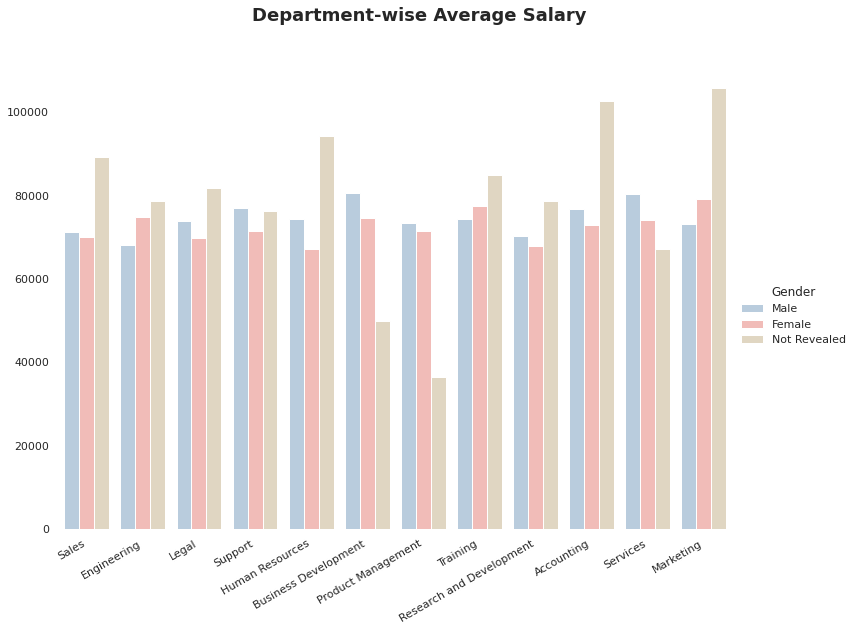

In [160]:
#@title
sns.set_theme(context='notebook', style='white', palette=custom_palette, 
              font='sans-serif', font_scale=1, 
              color_codes=False, rc=None)

ax = sns.catplot(x='Department', y='Salary', hue='Gender', 
                 data = emp, kind='bar', 
                 height=7, aspect = 1.5, ci=None);

plt.xticks(rotation=30, horizontalalignment="right")

ax.set(ylim=(0, 110000))
ax.set_ylabels("")
ax.set_xlabels("")

ax.fig.suptitle('Department-wise Average Salary',position=(0.5,1.10), 
                fontweight='bold', size=18)

sns.despine(left=True,bottom=True ,offset=10, trim=True) #Reducing junk

In [161]:
#@title
#Creating separate data sets of Males & Females
males = emp[emp['Gender'] == 'Male']
print(males.shape) # 430 rows as expected

females = emp[emp['Gender'] == 'Female']
females.shape # 430 rows as expected

(430, 6)


(406, 6)

In [162]:
#@title
# Male's average pay for each department

pay_m_dept = males.groupby('Department')['Salary'].mean().round(0)
pay_m_dept 

Department
Accounting                  76726.0
Business Development        80596.0
Engineering                 68097.0
Human Resources             74345.0
Legal                       73832.0
Marketing                   73242.0
Product Management          73484.0
Research and Development    70338.0
Sales                       71287.0
Services                    80379.0
Support                     77054.0
Training                    74247.0
Name: Salary, dtype: float64

In [163]:
#@title
# Female's average pay for each department

pay_f_dept = females.groupby('Department')['Salary'].mean().round(0)
pay_f_dept 

Department
Accounting                  72814.0
Business Development        74667.0
Engineering                 74868.0
Human Resources             67062.0
Legal                       69904.0
Marketing                   79108.0
Product Management          71558.0
Research and Development    67888.0
Sales                       70144.0
Services                    74161.0
Support                     71586.0
Training                    77579.0
Name: Salary, dtype: float64

In [164]:
#@title
# Department-wise gender pay gap
pay_gap_dept = ((pay_m_dept/pay_f_dept) - 1)*100
round(pay_gap_dept, 0)

Department
Accounting                   5.0
Business Development         8.0
Engineering                 -9.0
Human Resources             11.0
Legal                        6.0
Marketing                   -7.0
Product Management           3.0
Research and Development     4.0
Sales                        2.0
Services                     8.0
Support                      8.0
Training                    -4.0
Name: Salary, dtype: float64

## Using a function to identify positive or negative wage gap

read more about data frame styling: https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html

In [165]:
def positive_negative(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'pink' if val < 0 else 'yellow'
    return 'color: %s' % color

In [166]:
gap_dept = pd.DataFrame(pay_gap_dept)
gap_dept.style.applymap(positive_negative)

,Salary
Department,
Accounting,5.372593
Business Development,7.940590
Engineering,-9.043917
Human Resources,10.860100
Legal,5.619135
Marketing,-7.415179
Product Management,2.691523
Research and Development,3.608885
Sales,1.629505


**Observations:**
- In departments like Engineering, Marketing & Training, female's average pay is higher than that of males. 
- For rest of the departments, Male's get more than females.

We should also explore distribution of salaries, experience or other factors for better understanding

## Using a function to highlight maximum value

In [167]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: purple' if v else '' for v in is_max]

In [168]:
gap_dept.style.apply(highlight_max)

,Salary
Department,
Accounting,5.372593
Business Development,7.940590
Engineering,-9.043917
Human Resources,10.860100
Legal,5.619135
Marketing,-7.415179
Product Management,2.691523
Research and Development,3.608885
Sales,1.629505


Observations:
- Highest wage gap is in HR department where Male's average pay is almost 11% (10.86) higher than that of females

( 74345.0 - 67062)/74345.0 = 0.09796220324
- Alternately, we can say that Female's average pay is almost 10% (9.796) lower than that of Males


In [169]:
# Department-wise gender pay gap
print(pay_gap_dept)

# differences = (salaries_by_group.loc['female'] - salaries_by_group.loc['male'])*100/salaries_by_group.loc['male']

labels  = pay_gap_dept.sort_values().index
labels

Department
Accounting                   5.372593
Business Development         7.940590
Engineering                 -9.043917
Human Resources             10.860100
Legal                        5.619135
Marketing                   -7.415179
Product Management           2.691523
Research and Development     3.608885
Sales                        1.629505
Services                     8.384461
Support                      7.638365
Training                    -4.294977
Name: Salary, dtype: float64


Index(['Engineering', 'Marketing', 'Training', 'Sales', 'Product Management',
       'Research and Development', 'Accounting', 'Legal', 'Support',
       'Business Development', 'Services', 'Human Resources'],
      dtype='object', name='Department')

## Visualizing department-wise gender pay gap

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


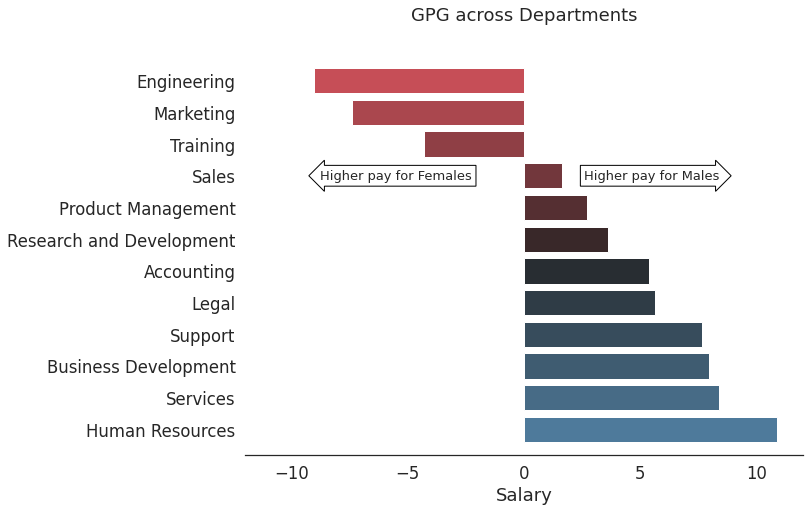

In [170]:
#@title
fig = plt.figure(figsize=(10, 7))
sns.set(font_scale=1.5)
sns.set_style('white')

x = pay_gap_dept.sort_values()
y = [i for i in range(len(pay_gap_dept))]

palette = sns.diverging_palette(10, 240, n=12, center ='dark')
ax = sns.barplot(x, y, orient = 'h', palette = palette);

#Draws the two arrows
bbox_props = dict(boxstyle="rarrow,pad=0.3", fc="white", ec="black", lw=1)
t = plt.text(5.5, 3, "Higher pay for Males", ha="center", va="center", rotation=0,
            size=13,
            bbox=bbox_props)
bbox_props2 = dict(boxstyle="larrow,pad=0.3", fc="white", ec="black", lw=1)
t = plt.text(-5.5, 3, "Higher pay for Females", ha="center", va="center", rotation=0,
            size=13,
            bbox=bbox_props2)

   
plt.yticks(range(len(pay_gap_dept)), labels)
plt.title('GPG across Departments', position=(0.5,1.10))
# plt.xlabel('Percent Difference in Average Salary (Males - Females)')
plt.xlim(-12, 12)
sns.despine(left=True, offset=10)
# plt.show()

In [171]:
#@title
import numpy as np

salaries_by_department = pd.pivot_table(data = emp, 
                                   values = 'Salary',
                                   columns = 'Department', index='Gender',
                                   aggfunc = np.mean)
salaries_by_department

Department,Accounting,Business Development,Engineering,Human Resources,Legal,Marketing,Product Management,Research and Development,Sales,Services,Support,Training
Gender,,,,,,,,,,,,
Female,72814.444444,74667.105263,74867.714286,67061.621622,69904.062500,79107.741935,71557.948718,67887.8125,70144.375000,74160.512821,71585.666667,77578.823529
Male,76726.388889,80595.757576,68096.857143,74344.848485,73832.272727,73242.258065,73483.750000,70337.5000,71287.179487,80379.142857,77054.146341,74247.428571
Not Revealed,102560.000000,49956.666667,78626.000000,94283.333333,81875.000000,105870.000000,36480.000000,78614.0000,89125.000000,67066.666667,76225.000000,84943.333333


In [172]:
#@title
# Male/Female in each department
gender_dept = pd.crosstab(emp['Gender'], emp['Department'])
gender_dept

Department,Accounting,Business Development,Engineering,Human Resources,Legal,Marketing,Product Management,Research and Development,Sales,Services,Support,Training
Gender,,,,,,,,,,,,
Female,27,38,35,37,32,31,39,32,32,39,30,34
Male,36,33,35,33,44,31,40,28,39,35,41,35
Not Revealed,2,3,5,3,4,1,1,5,4,3,4,3


In [173]:
#@title
# gender_dept
gender_dept.iloc[0]
gender_dept.iloc[1]

Department
Accounting                  36
Business Development        33
Engineering                 35
Human Resources             33
Legal                       44
Marketing                   31
Product Management          40
Research and Development    28
Sales                       39
Services                    35
Support                     41
Training                    35
Name: Male, dtype: int64

In [174]:
#@title
#Labels each bar with the percentage of females
percent_labels = gender_dept.iloc[0]*100 \
                /(gender_dept.iloc[0] + gender_dept.iloc[1])
percent_labels.round(0).astype(int)

Department
Accounting                  43
Business Development        54
Engineering                 50
Human Resources             53
Legal                       42
Marketing                   50
Product Management          49
Research and Development    53
Sales                       45
Services                    53
Support                     42
Training                    49
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


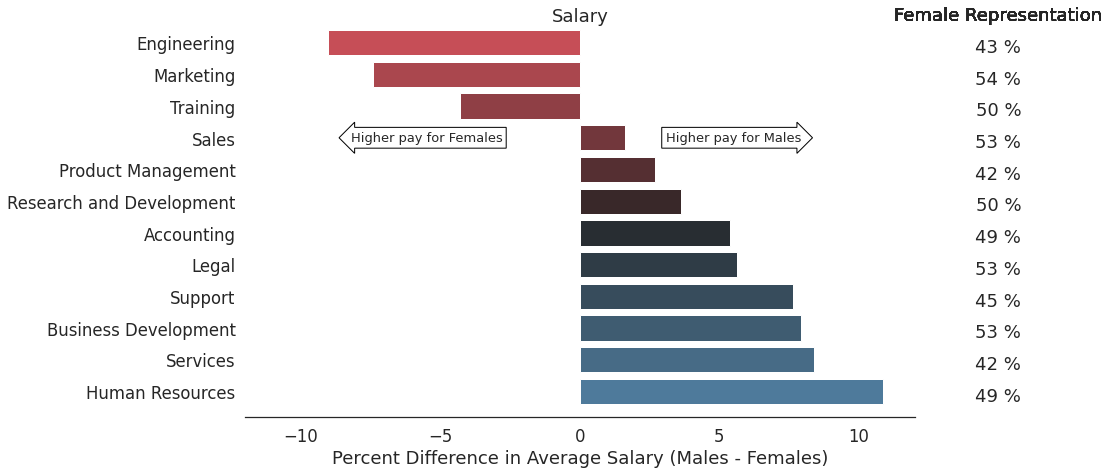

In [175]:
#@title
fig = plt.figure(figsize=(12, 7))
sns.set(font_scale=1.5)
sns.set_style('white')

x = pay_gap_dept.sort_values()
y = [i for i in range(len(pay_gap_dept))]

palette = sns.diverging_palette(10, 240, n=12, center ='dark')
ax = sns.barplot(x, y, orient = 'h', palette = palette)

#Draws the two arrows
bbox_props = dict(boxstyle="rarrow,pad=0.3", fc="white", ec="black", lw=1)
t = plt.text(5.5, 3, "Higher pay for Males", ha="center", va="center", rotation=0,
            size=13,
            bbox=bbox_props)
bbox_props2 = dict(boxstyle="larrow,pad=0.3", fc="white", ec="black", lw=1)
t = plt.text(-5.5, 3, "Higher pay for Females", ha="center", va="center", rotation=0,
            size=13,
            bbox=bbox_props2)

for i in range(len(ax.patches)):
    p = ax.patches[i]
    width = p.get_width()*1+1
    ax.text(15,
            p.get_y()+p.get_height()/2+0.3,
            '{:1.0f}'.format(percent_labels[i])+' %',
            ha="center") 
    ax.text(15, -1+0.3, 'Female Representation',
            ha="center", fontname='Arial', rotation = 0) 

    
plt.yticks(range(len(pay_gap_dept)), labels)
plt.title('Salary')
plt.xlabel('Percent Difference in Average Salary (Males - Females)')
plt.xlim(-12, 12)

sns.despine(offset=10, left=True)
plt.show()

**Observations:**
To compute gender wage gap, we've calculated the mean difference between male and female's pay based on job categories. Then we've converted the values into a percentage by using this formula:

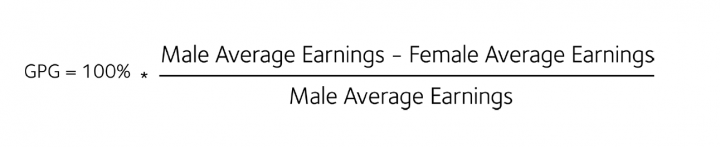

Mean Percent Difference = (Male Mean Pay - Female Mean Pay)*100 Female Mean Pay

 - None of these percentages were more than 12%, and 
 - not all of these percentage values showed favoritism towards males. 
 
 However, we should keep in mind that we do not have access to job experience data which would directly correlate with base pay.

In addition, we've included a short table of female representation for each job group on the right side of the graph. 

## Location-wise Average Salary

In [ ]:
#Location-wise average salary for females & males

emp.groupby(['Loc', 'Gender'])['Salary'].mean().round(0)  

Loc          Gender      
Bellevue     Female          75103.0
             Male            76315.0
             Not Revealed    86860.0
Los Angeles  Female          72568.0
             Male            74056.0
             Not Revealed    78643.0
Wellington   Female          70732.0
             Male            73613.0
             Not Revealed    75965.0
Name: Salary, dtype: float64

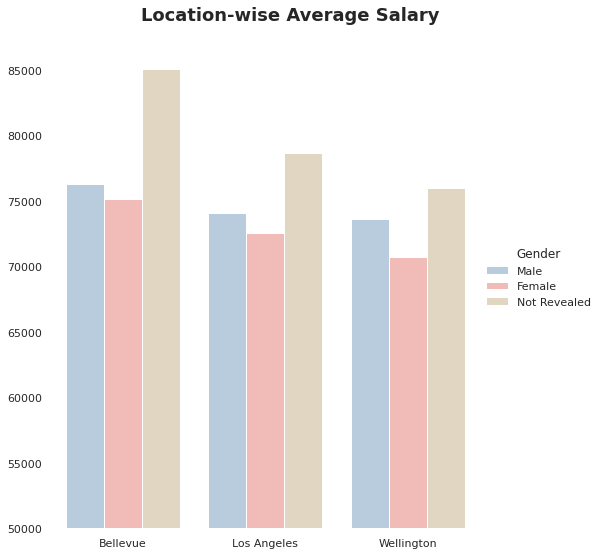

In [ ]:
#@title
sns.set_theme(context='notebook', style='white', palette=custom_palette, 
              font='sans-serif', font_scale=1, 
              color_codes=False, rc=None)

plot_order = emp.groupby('Loc')['Salary'].mean().sort_values(ascending=False).index.values

ax = sns.catplot(x='Loc', y='Salary', hue='Gender', data=emp, kind='bar', 
                 order=plot_order, 
                 height=7, aspect = 1, ci=None);

plt.xticks(rotation=0, horizontalalignment="center")

ax.set(ylim=(50000, 85000))
ax.set_ylabels("")
ax.set_xlabels("")

ax.fig.suptitle('Location-wise Average Salary',position=(0.5,1.10), 
                fontweight='bold', size=18)

sns.despine(left=True,bottom=True ,offset=10, trim=True) 

In [ ]:
#@title
# Male's average pay for each Location

pay_m_loc = males.groupby('Loc')['Salary'].mean().round(0)
pay_m_loc 


Loc
Bellevue       76315.0
Los Angeles    74056.0
Wellington     73613.0
Name: Salary, dtype: float64

In [ ]:
#@title
# Female's average pay for each Location

pay_f_loc = females.groupby('Loc')['Salary'].mean().round(0)
pay_f_loc 

Loc
Bellevue       75103.0
Los Angeles    72568.0
Wellington     70732.0
Name: Salary, dtype: float64

## Location-wise Gender Pay Gap

In [ ]:
# Location-wise gender pay gap

pay_gap_loc = ((pay_m_loc/pay_f_loc) - 1)*100
pay_gap_loc

Loc
Bellevue       1.613784
Los Angeles    2.050491
Wellington     4.073121
Name: Salary, dtype: float64

- At all locations, males make more money than their female counterparts.
- Highest wage gap is at Wellington location where male's average salary is 4.07 % higher than female's average salary

## Distribution of 'Salary' across organization for males/females

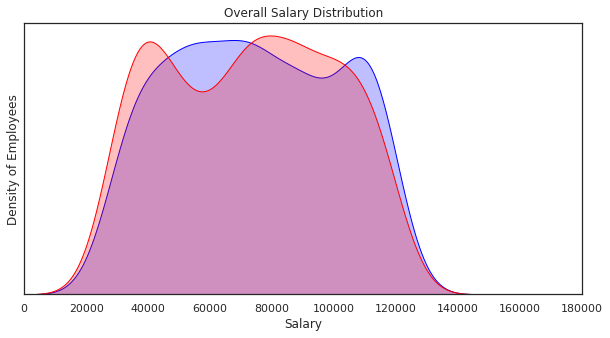

In [ ]:
#@title
fig = plt.figure(figsize=(10, 5))


ax = sns.kdeplot(males['Salary'], color ='Blue', label='Male', shade=True)
ax = sns.kdeplot(females['Salary'], color='Red', label='Female', shade=True)

plt.yticks([])
plt.title('Overall Salary Distribution')
plt.ylabel('Density of Employees')
plt.xlabel('Salary')
plt.xlim(0, 180000)
plt.show()

- looks almost similar
- In the range of ~40k to ~70k gender wage gap is in favor of males while in the range of ~70k to ~12k, it's in favor of males
- we need to dig deeper to get more insights

In [ ]:
emp_gender = emp[emp['Gender'] != 'Not Revealed']
emp_gender['Gender'].value_counts()

Male      430
Female    406
Name: Gender, dtype: int64

In [ ]:
# Male/Female in each department
gender_dept = pd.crosstab(emp['Gender'], emp['Department'], margins=True, margins_name= 'Across the organization' ,normalize='columns').round(2)
print(gender_dept)

Department    Accounting  ...  Across the organization
Gender                    ...                         
Female              0.42  ...                     0.46
Male                0.55  ...                     0.49
Not Revealed        0.03  ...                     0.04

[3 rows x 13 columns]


In [ ]:
#Computing percentages
femalepercentages = gender_dept.iloc[0]*100
malepercentages = gender_dept.iloc[1]*100
print("Female Percentages: ", '\t', femalepercentages.astype(int))
print()
print("Male Percentages: ", '\t', malepercentages.astype(int))


Female Percentages:  	 Department
Accounting                  42
Business Development        51
Engineering                 47
Human Resources             51
Legal                       40
Marketing                   49
Product Management          49
Research and Development    49
Sales                       43
Services                    51
Support                     40
Training                    47
Across the organization     46
Name: Female, dtype: int64

Male Percentages:  	 Department
Accounting                  55
Business Development        45
Engineering                 47
Human Resources             45
Legal                       55
Marketing                   49
Product Management          50
Research and Development    43
Sales                       52
Services                    45
Support                     55
Training                    49
Across the organization     49
Name: Male, dtype: int64


In [ ]:
# Sorting values
malepercentages=malepercentages.sort_values(ascending=True)
print(malepercentages, '\n')
femalepercentages=femalepercentages.sort_values(ascending=False)
print(femalepercentages, '\n')
length = range(len(femalepercentages))
length

Department
Research and Development    43.0
Business Development        45.0
Human Resources             45.0
Services                    45.0
Engineering                 47.0
Marketing                   49.0
Training                    49.0
Across the organization     49.0
Product Management          50.0
Sales                       52.0
Accounting                  55.0
Legal                       55.0
Support                     55.0
Name: Male, dtype: float64 

Department
Services                    51.0
Human Resources             51.0
Business Development        51.0
Research and Development    49.0
Product Management          49.0
Marketing                   49.0
Training                    47.0
Engineering                 47.0
Across the organization     46.0
Sales                       43.0
Accounting                  42.0
Support                     40.0
Legal                       40.0
Name: Female, dtype: float64 



range(0, 13)

## Gender Representation by Department

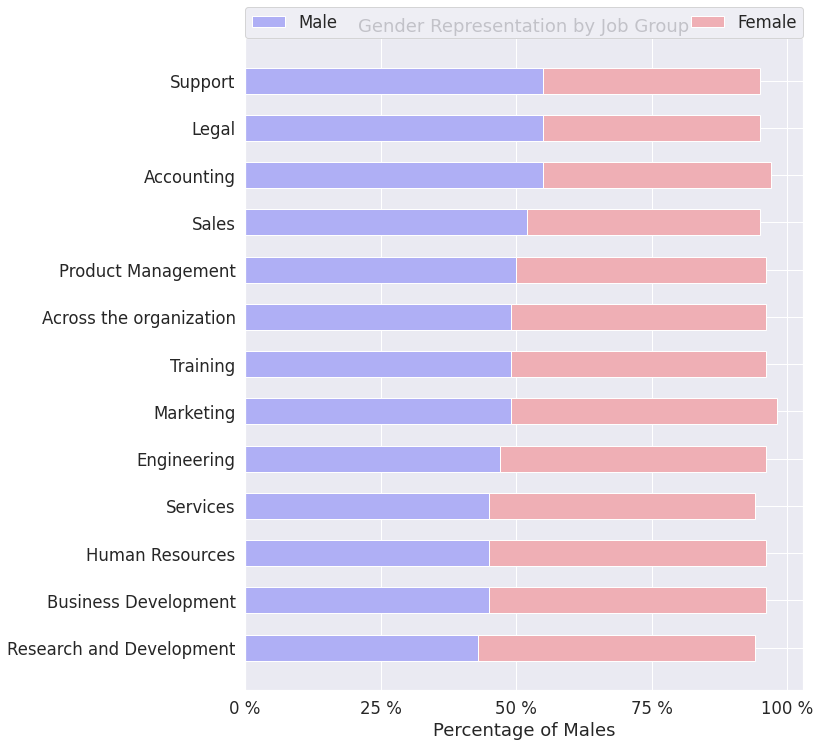

In [ ]:
#@title
#Plots the bar chart
fig = plt.figure(figsize=(10, 12))
sns.set(font_scale=1.5)
p1 = plt.barh(length, malepercentages.values, 0.55, label='Male', color='#AFAFF5')
p2 = plt.barh(length, femalepercentages, 0.55, left=malepercentages, color='#EFAFB5', label='Female')



labels = malepercentages.index
plt.yticks(range(len(malepercentages)), labels)
plt.xticks([0, 25, 50, 75, 100], ['0 %', '25 %', '50 %', '75 %', '100 %'])
plt.xlabel('Percentage of Males')
plt.title('Gender Representation by Job Group')
plt.legend(bbox_to_anchor=(0, 1, 1, 0), loc=3,
           ncol=2, mode="expand", borderaxespad=0)
plt.show()

- It represents  an overview of gender representation based on job category. 
- It is safe to say that in all departments, almost same number of males and females.

# Another way to compute gender wage gap

There are different ways to compute gender wage gap.

- Many times, it is derived by taking the total annual earnings of men in the company in a given year and dividing that by the number of male workers. 

This gives us the average annual earnings of an man. 
- Then we do the same thing but for women.
- Finally, we compute percentage ratio of average annual earnings of an woman with respect to average annual earnings of an man

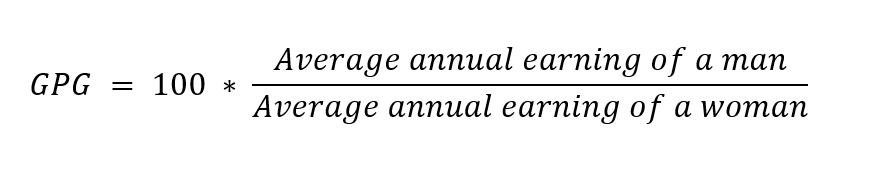

In [ ]:
# Total salary taken by males
total_male_salary = emp[emp['Gender'] == 'Male']['Salary'].sum()
total_male_salary

32037860.0

In [ ]:
# Total number of males
num_males = emp[emp['Gender'] == 'Male']['Gender'].count()
num_males

430

In [ ]:
# Average salary of an male
av_male_salary = total_male_salary/num_males
print("Average salary of a man: ", av_male_salary.round(0))

Average salary of a man:  74507.0


In [ ]:
# Total salary taken by females
total_female_salary = emp[emp['Gender'] == 'Female']['Salary'].sum()
print(total_female_salary)
# Total number of males
num_females = emp[emp['Gender'] == 'Female']['Gender'].count()
print(num_females)
print()
# Average salary of an male
av_female_salary = total_female_salary/num_females
print("Average salary of a woman: ", av_female_salary.round(0))

29479560.0
406

Average salary of a woman:  72610.0


In [ ]:
# Gender Wage gap
pay_gap_new = (av_female_salary/av_male_salary)*100
pay_gap_new.round(2)

97.45

**On an average, females get 97.45% of average salary of males.**

## Employees with highest & lowest salaries

In [ ]:
emp['Salary'].nlargest()

879    119930.0
22     119750.0
902    119670.0
202    119660.0
269    119550.0
Name: Salary, dtype: float64

In [ ]:
emp['Salary'].nsmallest()

428    28130.0
533    28160.0
719    28310.0
40     28330.0
60     28480.0
Name: Salary, dtype: float64